# Data cleanup and data encoding :

In [374]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

# to keep outputs
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [375]:
df = pd.read_csv("/content/drive/MyDrive/first inten project.csv")

In [376]:
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [377]:
df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [379]:
df = df.drop(['Booking_ID'],axis=1)

In [380]:
df.rename(columns={'average price ':'average price'},inplace=True)

In [381]:
df.rename(columns={'type of meal':'meal plan'},inplace=True)

In [382]:
print(df['meal plan'].value_counts())
print('\n')
print(df['room type'].value_counts())
print('\n')
print(df['market segment type'].value_counts())

meal plan
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64


room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64


In [383]:
df['meal plan']=df['meal plan'].str.replace('Meal Plan ','')
df['meal plan']=df['meal plan'].str.replace('Not Selected','0')

df['meal plan']=df['meal plan'].astype(int)
df['meal plan'].unique()

array([1, 0, 2, 3])

In [384]:
df['room type']=df['room type'].str.replace('Room_Type ','')

df['room type']=df['room type'].astype(int)
df['room type'].unique()

array([1, 4, 2, 6, 5, 7, 3])

In [385]:
# One-Hot Encoding using Pandas
df = pd.get_dummies(df, columns=['market segment type'], drop_first=True)

# Displaying the first few rows of the updated DataFrame
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,meal plan,car parking space,room type,lead time,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,1,1,2,5,1,0,1,224,0,0,0,88.00,0,10/2/2015,Not_Canceled,False,False,True,False
1,1,0,1,3,0,0,1,5,0,0,0,106.68,1,11/6/2018,Not_Canceled,False,False,False,True
2,2,1,1,3,1,0,1,1,0,0,0,50.00,0,2/28/2018,Canceled,False,False,False,True
3,1,0,0,2,1,0,1,211,0,0,0,100.00,1,5/20/2017,Canceled,False,False,False,True
4,1,0,1,2,0,0,1,48,0,0,0,77.00,0,4/11/2018,Canceled,False,False,False,True


In [386]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], format='%m/%d/%Y',errors='coerce')

In [387]:
df['date of reservation'].isna().sum()

37

In [388]:
df = df.dropna(subset=['date of reservation'])

In [389]:
df['date of reservation'].isna().sum()

0

In [390]:
df['year'] = df['date of reservation'].dt.year
df['month'] = df['date of reservation'].dt.month
df['day'] = df['date of reservation'].dt.day
df['weekday'] = df['date of reservation'].dt.dayofweek
df['weekend'] = df['weekday'] >= 5
df['weekend']=df['weekend'].astype(int)

In [391]:
df = df.drop(['date of reservation'],axis=1)

In [392]:
df['booking status']=df['booking status'].str.replace('Not_Canceled','0')
df['booking status']=df['booking status'].str.replace('Canceled','1')
df['booking status']=df['booking status'].astype(int)
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,meal plan,car parking space,room type,lead time,repeated,P-C,...,booking status,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online,year,month,day,weekday,weekend
0,1,1,2,5,1,0,1,224,0,0,...,0,False,False,True,False,2015,10,2,4,0
1,1,0,1,3,0,0,1,5,0,0,...,0,False,False,False,True,2018,11,6,1,0
2,2,1,1,3,1,0,1,1,0,0,...,1,False,False,False,True,2018,2,28,2,0
3,1,0,0,2,1,0,1,211,0,0,...,1,False,False,False,True,2017,5,20,5,1
4,1,0,1,2,0,0,1,48,0,0,...,1,False,False,False,True,2018,4,11,2,0


In [393]:
#from google.colab import files
#csv_filename = 'cleaned_data.csv'
#excel_filename = 'cleaned_data.xlsx'
#df.to_csv(csv_filename, index=False)
#df.to_excel(excel_filename, index=False)

#files.download(csv_filename)
#files.download(excel_filename)

# Outlier handling :

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [395]:
df['number of adults'].value_counts()
# most number of adults are 2 adults, suggesting families of 2 parents are most common

number of adults
2    26093
1     7683
3     2317
0      139
4       16
Name: count, dtype: int64

In [396]:
df = df[df['number of adults'] != 0]

In [397]:
df['number of adults'].value_counts()
# 139 rows with number of adults = 0 were dropped as a reservation made by children can't be accepted

number of adults
2    26093
1     7683
3     2317
4       16
Name: count, dtype: int64

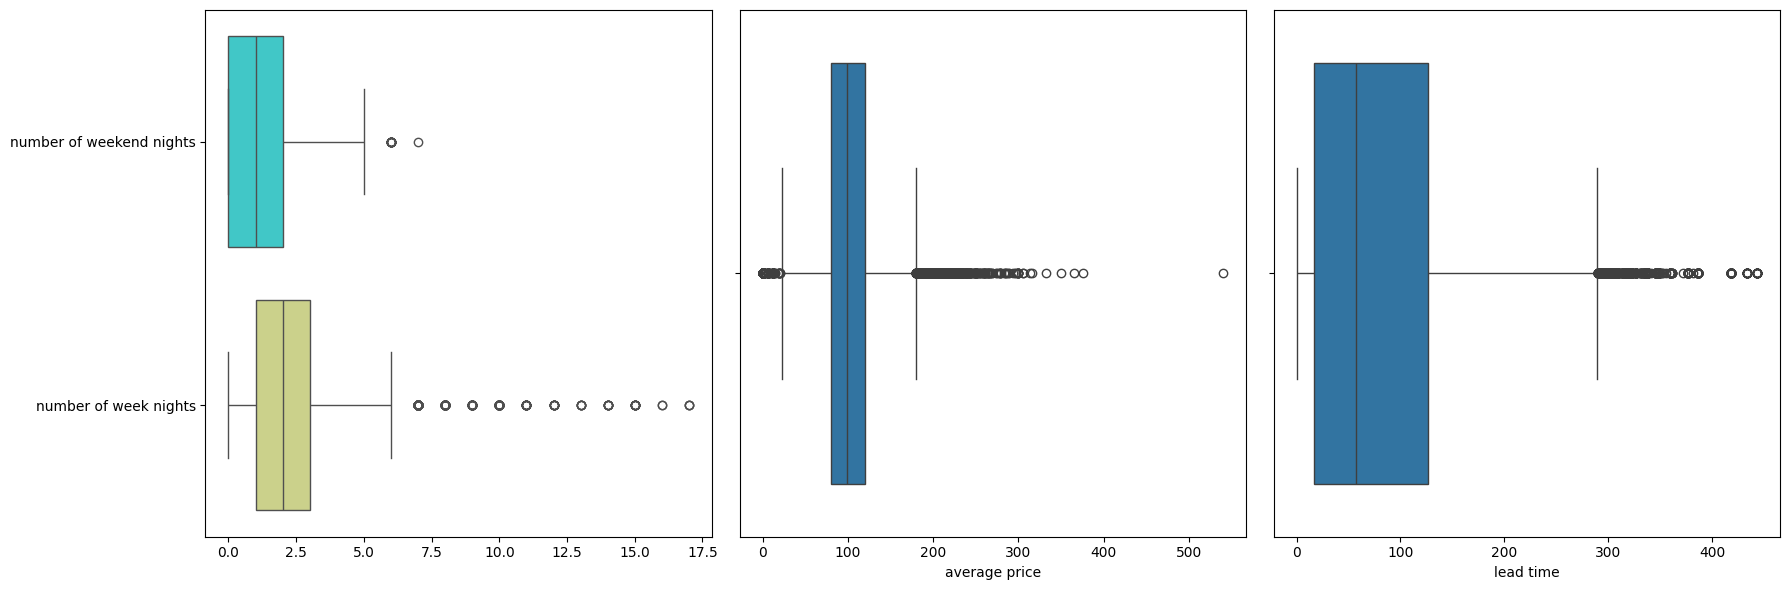

In [398]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

selected_columns = [
    'number of weekend nights',
    'number of week nights',
]

sns.boxplot(data=df[selected_columns], orient='h', palette='rainbow', ax=axs[0])

sns.boxplot(df['average price'], orient='h', ax=axs[1])

sns.boxplot(df['lead time'], orient='h', ax=axs[2])

plt.tight_layout()
plt.show()

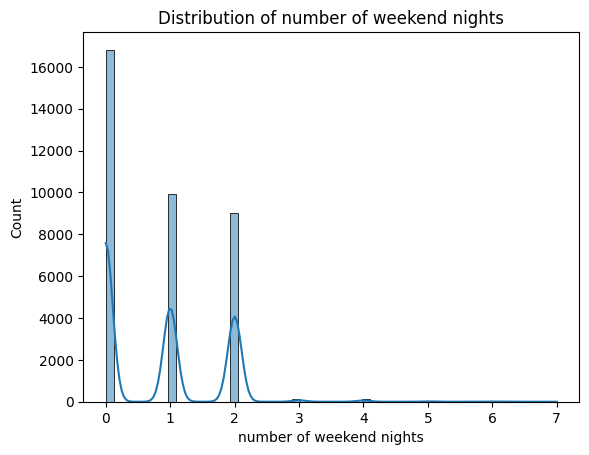

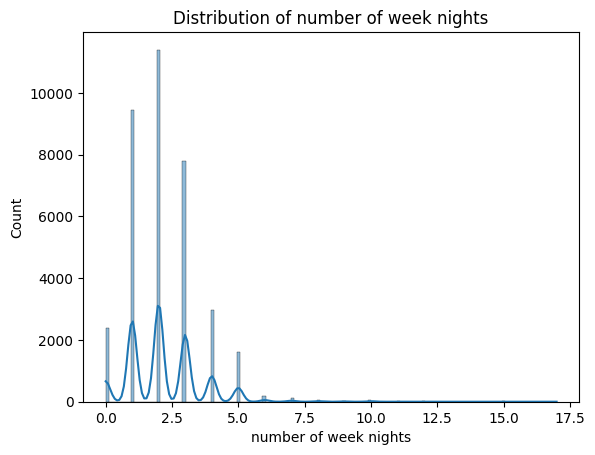

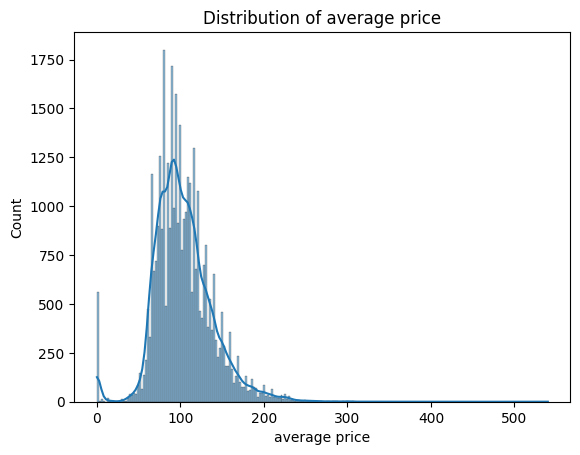

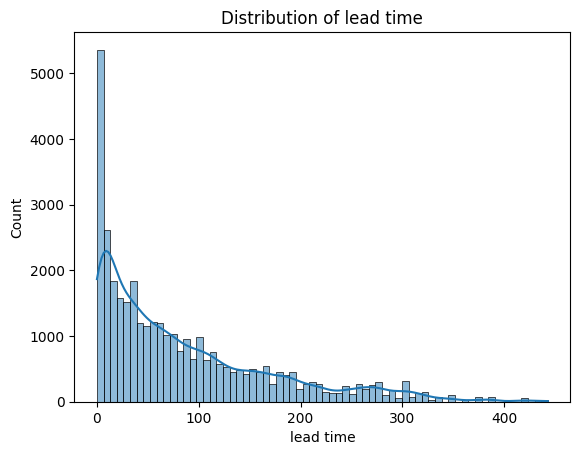

In [399]:
selected_columns = [
    'number of weekend nights',
    'number of week nights',
    'average price',
    'lead time'
]
for column in selected_columns:
    hist_plot = sns.histplot(df[column], kde=True)
    hist_plot.set_title(f'Distribution of {column}')
    plt.show()

In [400]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [401]:
selected_columns = [
    'number of weekend nights',
    'number of week nights',
    'average price',
    'lead time'
]
df_filtered = remove_outliers(df, selected_columns)
print(f"Shape before removing outliers: {df.shape}")
print(f"Shape after removing outliers: {df_filtered.shape}")

Shape before removing outliers: (36109, 23)
Shape after removing outliers: (33023, 23)


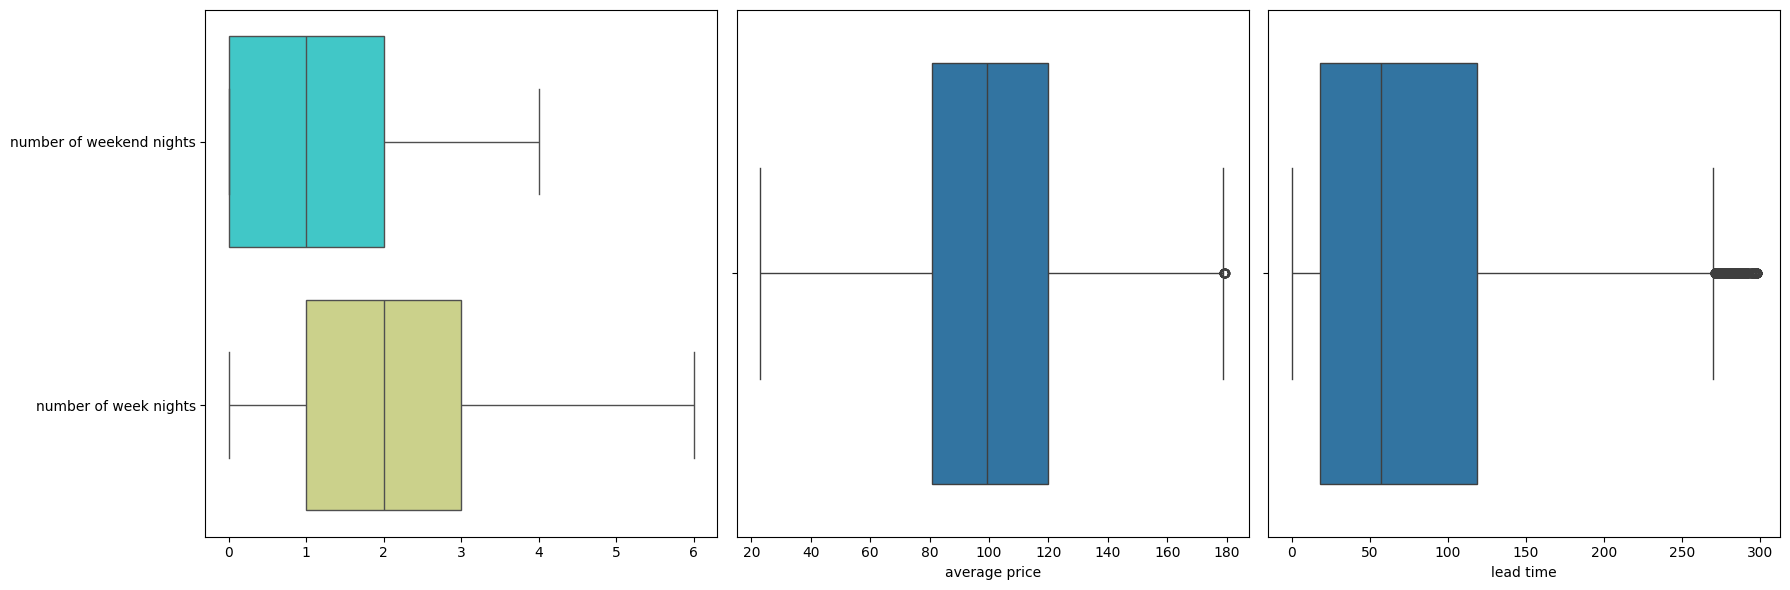

In [402]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

selected_columns = [
    'number of weekend nights',
    'number of week nights',
]

sns.boxplot(data=df_filtered[selected_columns], orient='h', palette='rainbow', ax=axs[0])

sns.boxplot(df_filtered['average price'], orient='h', ax=axs[1])

sns.boxplot(df_filtered['lead time'], orient='h', ax=axs[2])

plt.tight_layout()
plt.show()

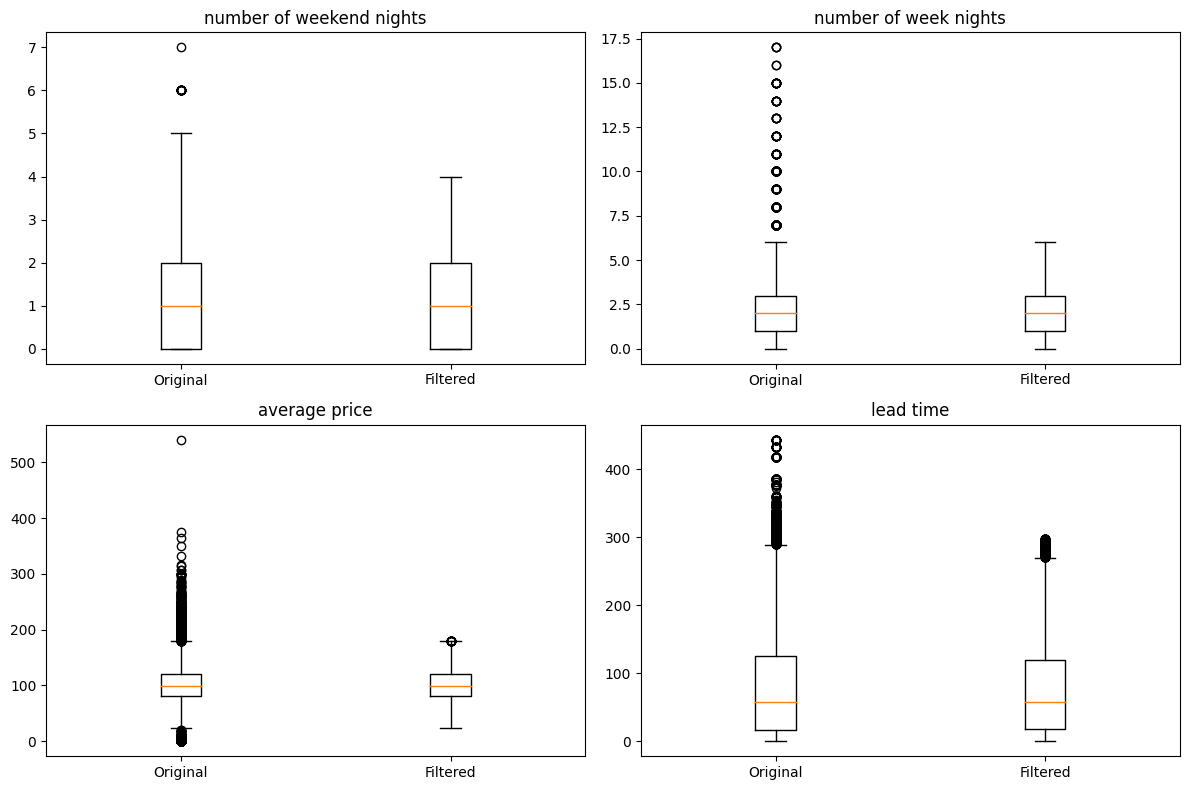

In [403]:
selected_columns = [
    'number of weekend nights',
    'number of week nights',
    'average price',
    'lead time'
]


plt.figure(figsize=(12, 8))

for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    plt.boxplot([df[column], df_filtered[column]], labels=['Original', 'Filtered'])
    plt.title(column)

plt.tight_layout()
plt.show()

In [404]:
df = df_filtered

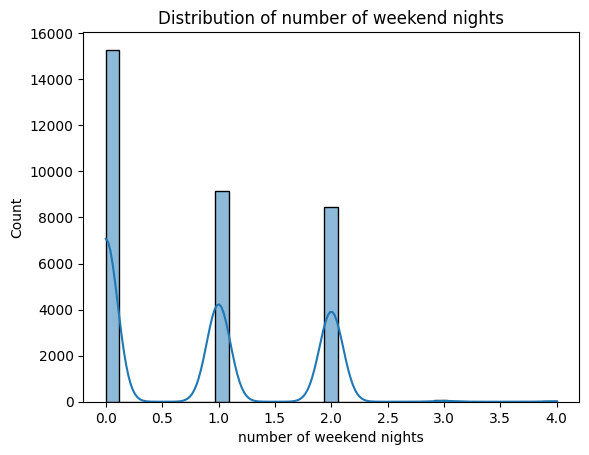

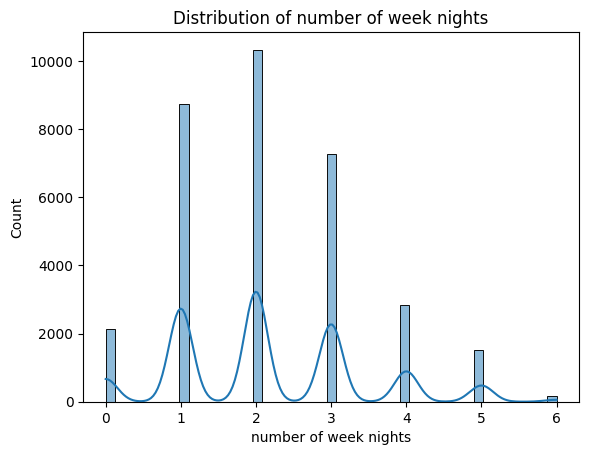

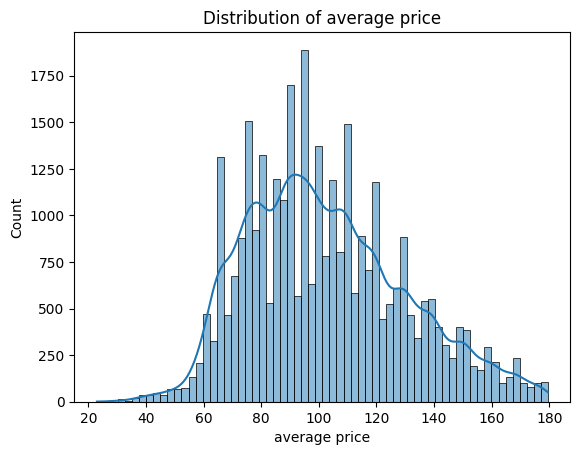

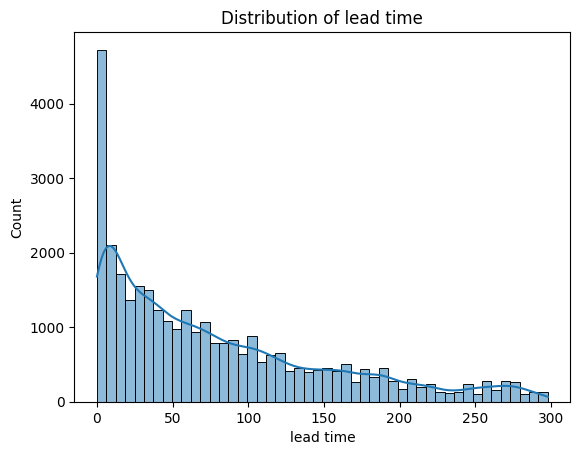

In [405]:
selected_columns = [
    'number of weekend nights',
    'number of week nights',
    'average price',
    'lead time'
]

for column in selected_columns:
    hist_plot = sns.histplot(df[column], kde=True)
    hist_plot.set_title(f'Distribution of {column}')
    plt.show()

# Feature engineering :

In [406]:
df['is_family'] = (df['number of adults'] >= 2) & (df['number of children'] > 0)
df['total nights'] = df['number of weekend nights'] + df['number of week nights']
df['total people'] = df['number of adults'] + df['number of children']

In [407]:
df.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'meal plan', 'car parking space', 'room type',
       'lead time', 'repeated', 'P-C', 'P-not-C', 'average price',
       'special requests', 'booking status',
       'market segment type_Complementary', 'market segment type_Corporate',
       'market segment type_Offline', 'market segment type_Online', 'year',
       'month', 'day', 'weekday', 'weekend', 'is_family', 'total nights',
       'total people'],
      dtype='object')

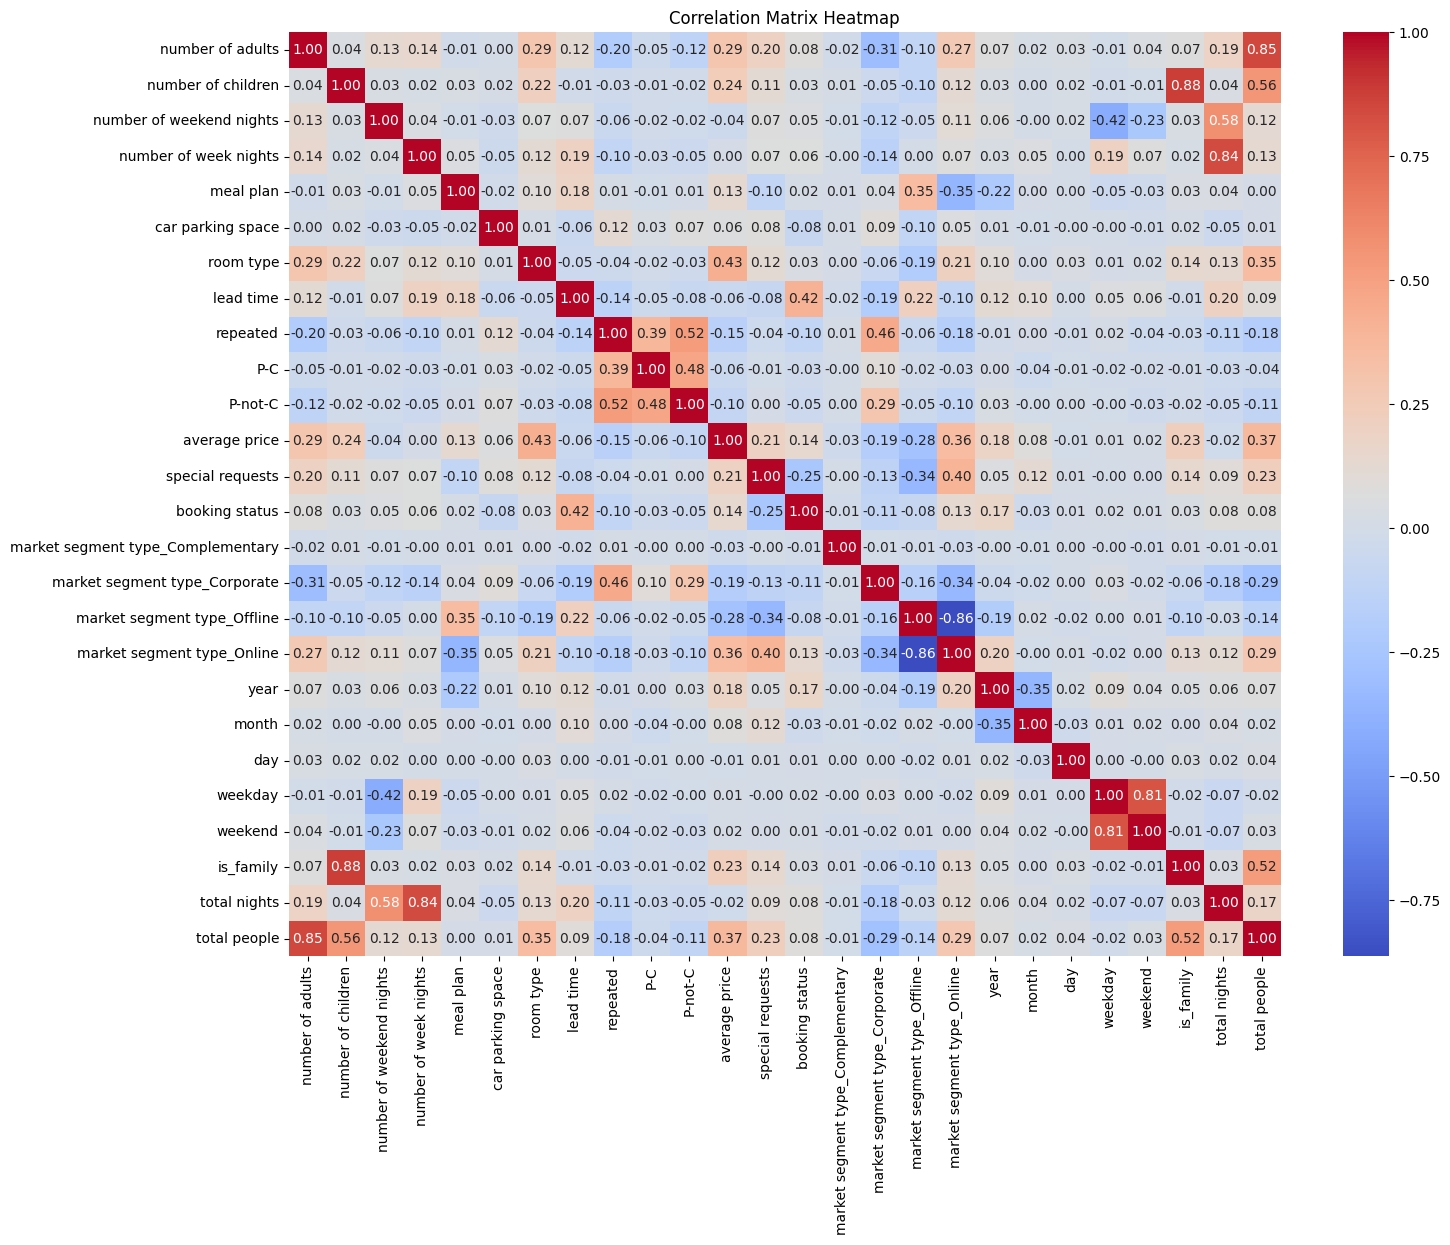

In [408]:
selected_columns = ['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'meal plan', 'car parking space', 'room type',
       'lead time', 'repeated', 'P-C', 'P-not-C', 'average price',
       'special requests', 'booking status',
       'market segment type_Complementary', 'market segment type_Corporate',
       'market segment type_Offline', 'market segment type_Online', 'year',
       'month', 'day', 'weekday', 'weekend', 'is_family', 'total nights',
       'total people']

# Correlation matrix
correlation_matrix = df[selected_columns].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

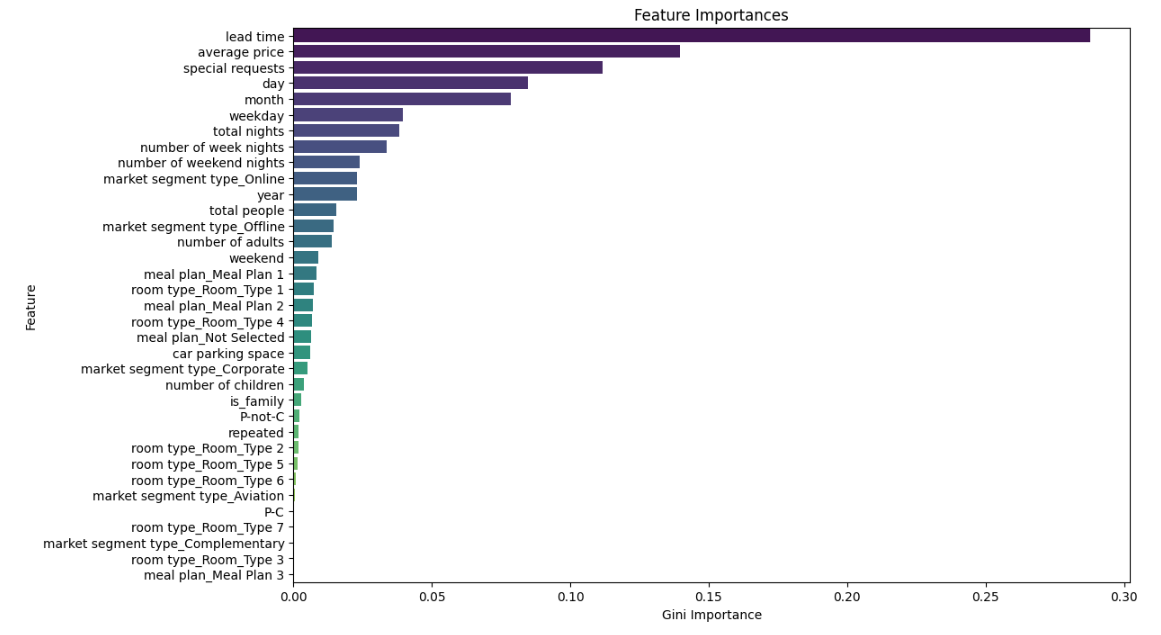

In [409]:
selected_features = [
       'total nights', 'meal plan',
       'car parking space', 'room type', 'lead time',
       'market segment type_Online', 'market segment type_Complementary',
       'market segment type_Corporate', 'market segment type_Offline',
       'repeated', 'average price',
       'special requests', 'year',
       'month', 'day','total people',
       'booking status'
       ]

# Drop columns except selected features
columns_to_drop = [col for col in df.columns if col not in selected_features]
df = df.drop(columns=columns_to_drop)

In [410]:
from google.colab import files
csv_filename = 'hotel_dataset.csv'
excel_filename = 'hotel_dataset.xlsx'
df.to_csv(csv_filename, index=False)
df.to_excel(excel_filename, index=False)

files.download(csv_filename)
files.download(excel_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import statsmodels.api as sm

def backward_elimination(data, target, significance_level=0.05):
    features = data.columns.tolist()
    features.remove(target)

    while len(features) > 0:
        X = data[features]
        X = sm.add_constant(X)
        y = data[target]

        model = sm.OLS(y, X).fit()
        p_values = model.pvalues.iloc[1:]  # exclude intercept
        max_p_value = p_values.max()

        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            print(f"Removing feature '{excluded_feature}' with p-value {max_p_value}")
        else:
            break

    return features

# Applying backward elimination
significant_features = backward_elimination(df, 'target')
print("Selected Features:", significant_features)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Separate features (X) and target variable (y)
X = df.drop('booking status', axis=1)
y = df['booking status']

# Apply SelectKBest with chi-squared test to select top k features
k = 10  # Number of top features to select
selector = SelectKBest(chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

print("Selected Features:")
print(selected_features)


# Random Forest (Accuracy: 0.90) :

In [411]:
df.columns

Index(['meal plan', 'car parking space', 'room type', 'lead time', 'repeated',
       'average price', 'special requests', 'booking status',
       'market segment type_Complementary', 'market segment type_Corporate',
       'market segment type_Offline', 'market segment type_Online', 'year',
       'month', 'day', 'total nights', 'total people'],
      dtype='object')

In [412]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Define features and target variable
features = [
       'total nights', 'meal plan',
       'car parking space', 'room type', 'lead time',
       'market segment type_Online', 'market segment type_Complementary',
       'market segment type_Corporate', 'market segment type_Offline',
       'repeated', 'average price',
       'special requests', 'year',
       'month', 'day','total people'
       ]

target = 'booking status'

In [413]:
# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Perform SMOTE oversampling
smote = SMOTE(random_state=42)
resampled_output = smote.fit_resample(X_train, y_train)

# Ensure that resampled_output contains exactly two elements
if len(resampled_output) == 2:
    X_resampled, y_resampled = resampled_output
else:
    raise ValueError("Unexpected output from SMOTE. Expected a tuple with 2 elements.")

# Create and train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42, criterion='entropy')
clf.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [414]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\n')
print(class_report)

Accuracy: 0.90
Precision: 0.84
Recall: 0.83
F1 Score: 0.83


              precision    recall  f1-score   support

           0       0.92      0.93      0.93      5703
           1       0.84      0.83      0.83      2553

    accuracy                           0.90      8256
   macro avg       0.88      0.88      0.88      8256
weighted avg       0.90      0.90      0.90      8256



Confusion Matrix:
[[5306  397]
 [ 445 2108]]


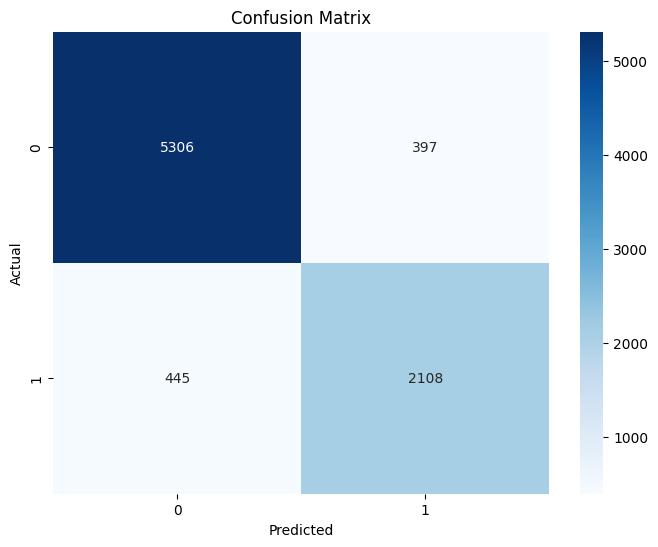

In [415]:
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [416]:
# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean():.2f}')
print(f'Standard Deviation of Cross-Validation Scores: {cv_scores.std():.2f}')

Cross-Validation Scores: [0.89159727 0.89644209 0.89568509 0.90036342 0.89839491]
Mean Cross-Validation Score: 0.90
Standard Deviation of Cross-Validation Scores: 0.00


In [417]:
# Cross-validation scores
cv_scores = [0.89583649, 0.89704769, 0.89598789, 0.90081769, 0.89809207]

# Calculate mean and standard deviation
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f'Mean Cross-Validation Score: {mean_cv_score:.4f}')
print(f'Standard Deviation of Cross-Validation Scores: {std_cv_score:.4f}')

Mean Cross-Validation Score: 0.8976
Standard Deviation of Cross-Validation Scores: 0.0018


In [418]:
# Built-in feature importance (Gini Importance)
importances = clf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
print(feature_imp_df)

                              Feature  Gini Importance
4                           lead time         0.295868
10                      average price         0.155469
11                   special requests         0.133386
14                                day         0.100312
13                              month         0.094475
0                        total nights         0.054058
5          market segment type_Online         0.049806
15                       total people         0.024557
1                           meal plan         0.019107
8         market segment type_Offline         0.017746
12                               year         0.017401
3                           room type         0.017268
2                   car parking space         0.009534
7       market segment type_Corporate         0.006755
9                            repeated         0.004241
6   market segment type_Complementary         0.000017


<ipython-input-419-475f558cecf0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gini Importance', y='Feature', data=feature_imp_df, palette='viridis')


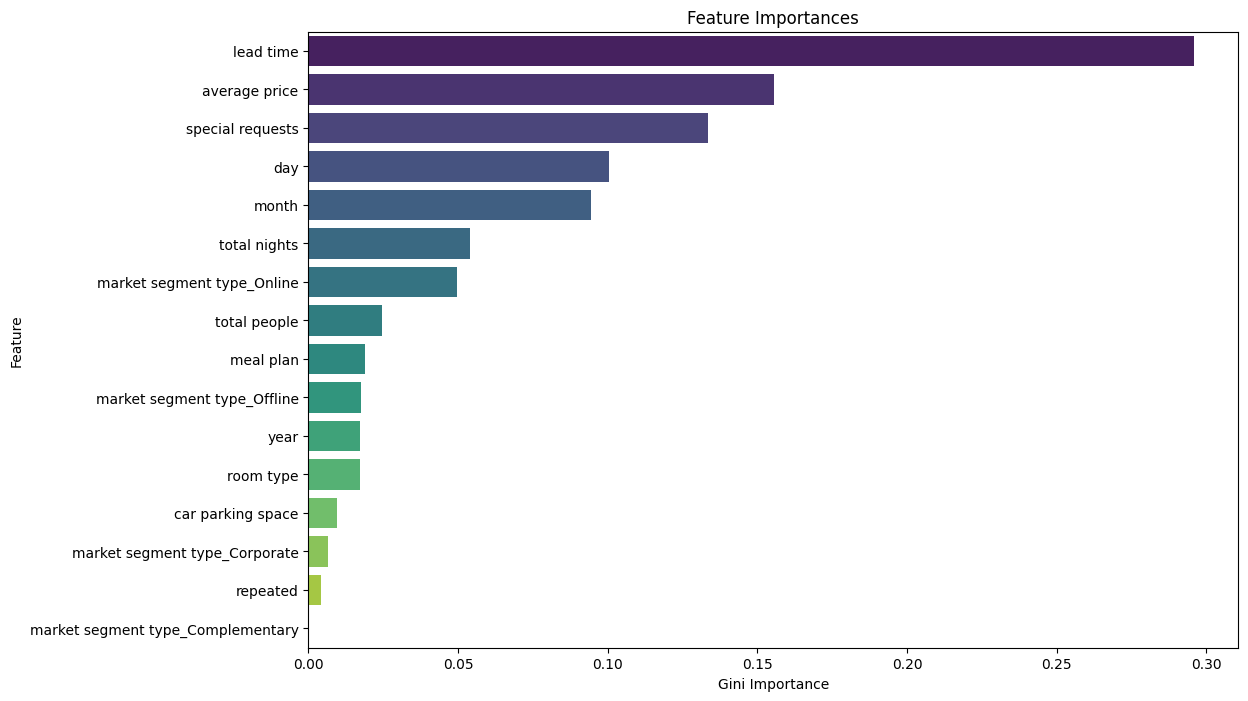

In [419]:
import seaborn as sns

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Gini Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


# exporting :

In [424]:
import pickle

pickle_file = "Random_forest_classifier.pkl"
with open(pickle_file, 'wb') as file:
    pickle.dump(clf, file)

In [425]:
# Load the model from the file
with open(pickle_file, 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions with the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the model
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Accuracy (Loaded Model): {accuracy_loaded}")


Accuracy (Loaded Model): 0.8980135658914729


In [426]:
# Download the saved model file
files.download(pickle_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>